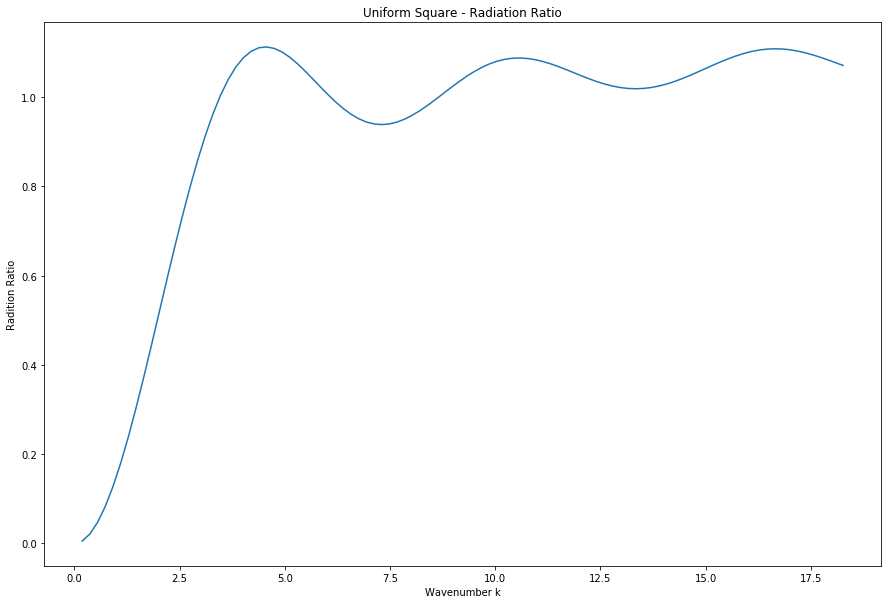

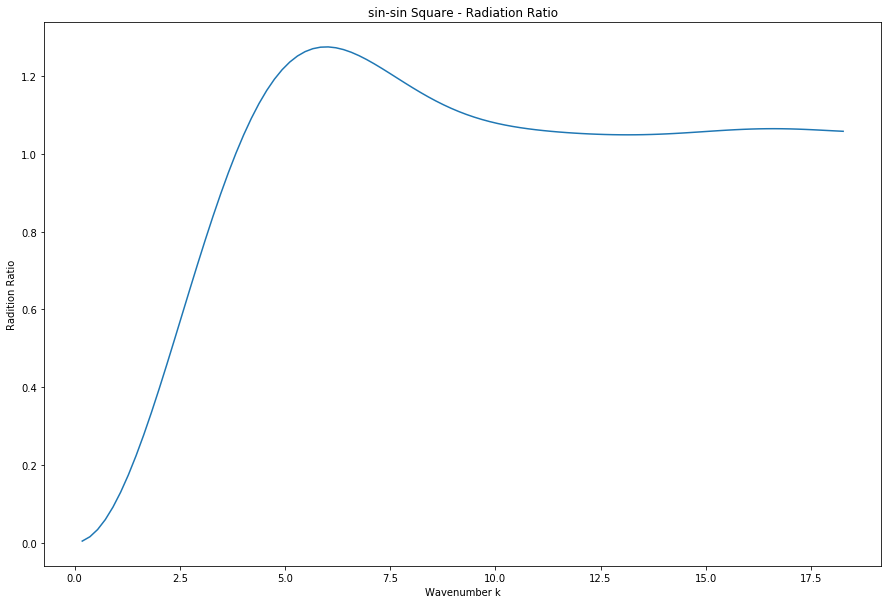

In [1]:
import numpy as np
from ExampleBoundaries import Square3D
from AcousticProperties import *
from RayleighSolver import *

import matplotlib.pyplot as plt
%matplotlib inline

exteriorPoint = np.array([[0.5, 0.5, 0.1]], dtype=np.float32)

# Test Problem 1

solver = RayleighSolver3D(*(Square3D()))

boundaryCondition = solver.neumannBoundaryCondition()
boundaryCondition.f.fill(1.0)

aK = np.empty(100, dtype=np.float32)
aSigma = np.empty(100, dtype=np.float32)
for i in range(100):
    f = 10 * (i+1)
    k = frequencyToWavenumber(f)
    solution = solver.solveBoundary(k, boundaryCondition)
    aK[i] = k
    aSigma[i] = solution.radiationRatio()

plt.rcParams['figure.figsize'] = [15, 10]
plt.title('Uniform Square - Radiation Ratio')
plt.plot(aK, aSigma, '-', label='BEM')
plt.xlabel('Wavenumber k')
plt.ylabel('Radition Ratio')
plt.show()


# Test Problem 2

solver = RayleighSolver3D(*(Square3D()))

boundaryCondition = solver.neumannBoundaryCondition()
boundaryCondition.f = np.sin(np.pi * solver.aCenters[:, 0]) * np.sin(np.pi * solver.aCenters[:, 1])

aK = np.empty(100, dtype=np.float32)
aSigma = np.empty(100, dtype=np.float32)
for i in range(100):
    f = 10 * (i+1)
    k = frequencyToWavenumber(f)
    solution = solver.solveBoundary(k, boundaryCondition)
    aK[i] = k
    aSigma[i] = solution.radiationRatio()

plt.rcParams['figure.figsize'] = [15, 10]
plt.title('sin-sin Square - Radiation Ratio')
plt.plot(aK, aSigma, '-', label='BEM')
plt.xlabel('Wavenumber k')
plt.ylabel('Radition Ratio')
plt.show()
